In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix


In [15]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)


train_generator = train_datagen.flow_from_directory(

    
    '/kaggle/input/dataset-sampah-organik-anorganik/dataset-sampah-organik-anorganik',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    '/kaggle/input/dataset-sampah-organik-anorganik/dataset-sampah-organik-anorganik',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 20062 images belonging to 2 classes.
Found 5015 images belonging to 2 classes.


In [16]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])



In [17]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


Epoch 1/10


I0000 00:00:1750571978.547608     113 service.cc:148] XLA service 0x7cfa2404eee0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750571978.548561     113 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1750571980.148371     113 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/627 ━━━━━━━━━━━━━━━━━━━━ 2:49:39 16s/step - accuracy: 0.4667 - loss: 0.7332

I0000 00:00:1750571983.793172     113 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


627/627 ━━━━━━━━━━━━━━━━━━━━ 137s 192ms/step - accuracy: 0.6396 - loss: 0.6358 - val_accuracy: 0.7147 - val_loss: 0.5837
Epoch 2/10
627/627 ━━━━━━━━━━━━━━━━━━━━ 50s 79ms/step - accuracy: 0.7164 - loss: 0.5583 - val_accuracy: 0.6764 - val_loss: 0.5935
Epoch 3/10
627/627 ━━━━━━━━━━━━━━━━━━━━ 49s 78ms/step - accuracy: 0.7388 - loss: 0.5288 - val_accuracy: 0.7372 - val_loss: 0.5501
Epoch 4/10
627/627 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.7479 - loss: 0.5183 - val_accuracy: 0.7049 - val_loss: 0.5832
Epoch 5/10
627/627 ━━━━━━━━━━━━━━━━━━━━ 48s 77ms/step - accuracy: 0.7540 - loss: 0.5104 - val_accuracy: 0.7641 - val_loss: 0.5390
Epoch 6/10
627/627 ━━━━━━━━━━━━━━━━━━━━ 61s 98ms/step - accuracy: 0.7664 - loss: 0.4985 - val_accuracy: 0.7488 - val_loss: 0.5363
Epoch 7/10
627/627 ━━━━━━━━━━━━━━━━━━━━ 65s 104ms/step - accuracy: 0.7579 - loss: 0.4972 - val_accuracy: 0.7643 - val_loss: 0.5355
Epoch 8/10
627/627 ━━━━━━━━━━━━━━━━━━━━ 65s 103ms/step - accuracy: 0.7732 - loss: 0.4808 - val_acc

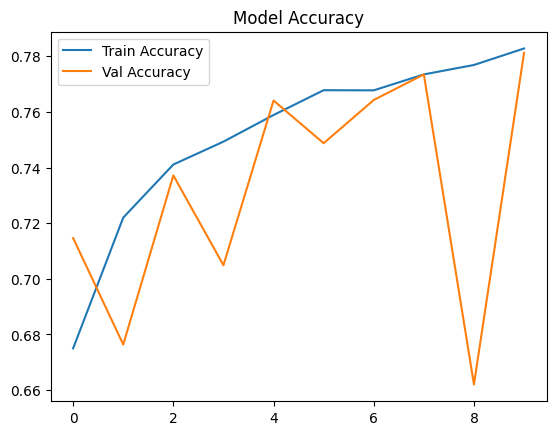

157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 99ms/step
[[ 839 1383]
 [1044 1749]]
              precision    recall  f1-score   support

           0       0.45      0.38      0.41      2222
           1       0.56      0.63      0.59      2793

    accuracy                           0.52      5015
   macro avg       0.50      0.50      0.50      5015
weighted avg       0.51      0.52      0.51      5015



In [18]:

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()


Y_pred = model.predict(val_generator)
y_pred = np.round(Y_pred).astype(int)
print(confusion_matrix(val_generator.classes, y_pred))
print(classification_report(val_generator.classes, y_pred))
